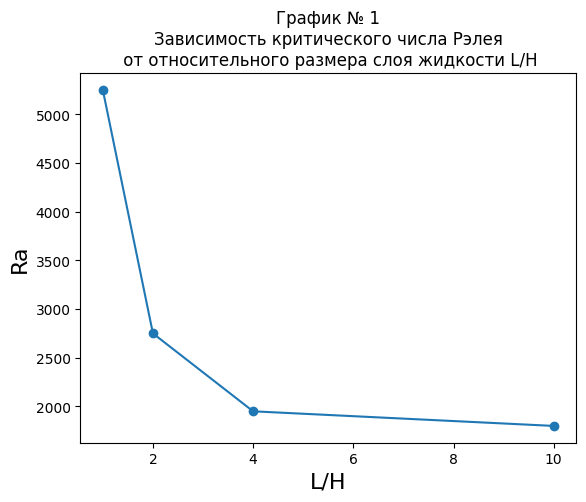

In [68]:
import matplotlib.pyplot as plt

LH = [ 1, 2, 4, 10]
Ra_cr = [5250, 2750, 1950, 1800]

plt.plot(LH, Ra_cr)
plt.scatter(LH, Ra_cr)
plt.xlabel("L/H", size=16)
plt.ylabel("Ra", size=16)

plt.title("График № 1\nЗависимость критического числа Рэлея\n от относительного размера слоя жидкости L/H")
plt.show()




[{'x': [0.0, 0.04040404040404, 0.08080808080808, 0.1212121212121, 0.1616161616162, 0.2020202020202, 0.2424242424242, 0.2828282828283, 0.3232323232323, 0.3636363636364, 0.4040404040404, 0.4444444444444, 0.4848484848485, 0.5252525252525, 0.5656565656566, 0.6060606060606, 0.6464646464646, 0.6868686868687, 0.7272727272727, 0.7676767676768, 0.8080808080808, 0.8484848484848, 0.8888888888889, 0.9292929292929, 0.969696969697, 1.010101010101, 1.050505050505, 1.090909090909, 1.131313131313, 1.171717171717, 1.212121212121, 1.252525252525, 1.292929292929, 1.333333333333, 1.373737373737, 1.414141414141, 1.454545454545, 1.494949494949, 1.535353535354, 1.575757575758, 1.616161616162, 1.656565656566, 1.69696969697, 1.737373737374, 1.777777777778, 1.818181818182, 1.858585858586, 1.89898989899, 1.939393939394, 1.979797979798, 2.020202020202, 2.060606060606, 2.10101010101, 2.141414141414, 2.181818181818, 2.222222222222, 2.262626262626, 2.30303030303, 2.343434343434, 2.383838383838, 2.424242424242, 2.4646

C:\Users\Asus Tuf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:138: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


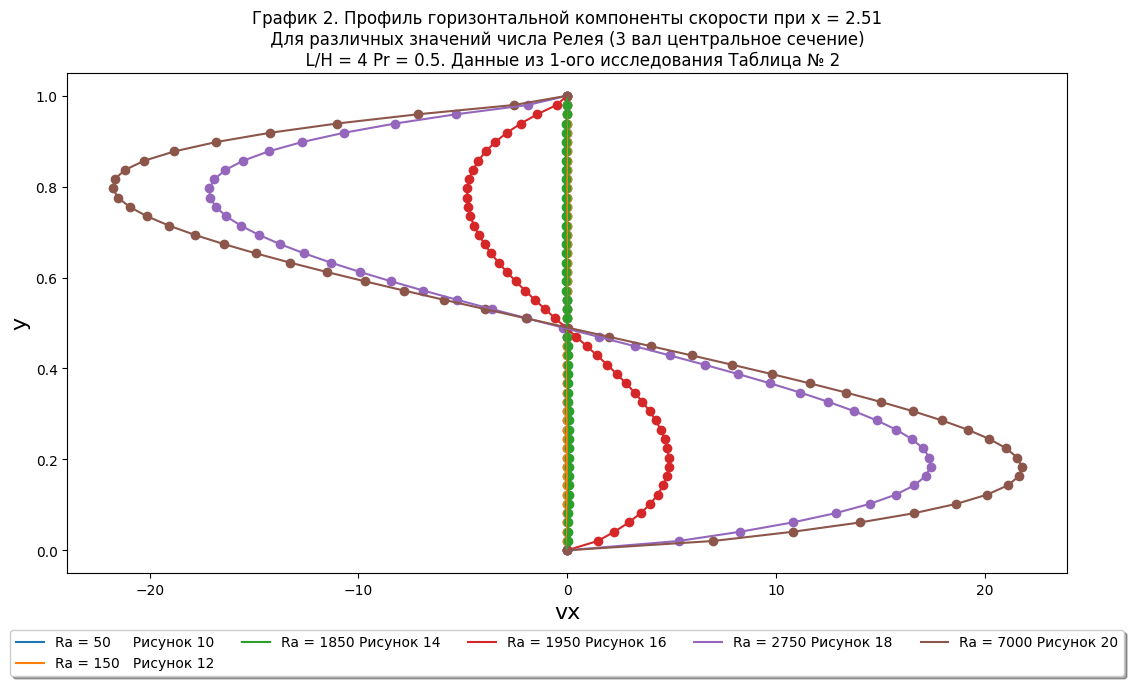

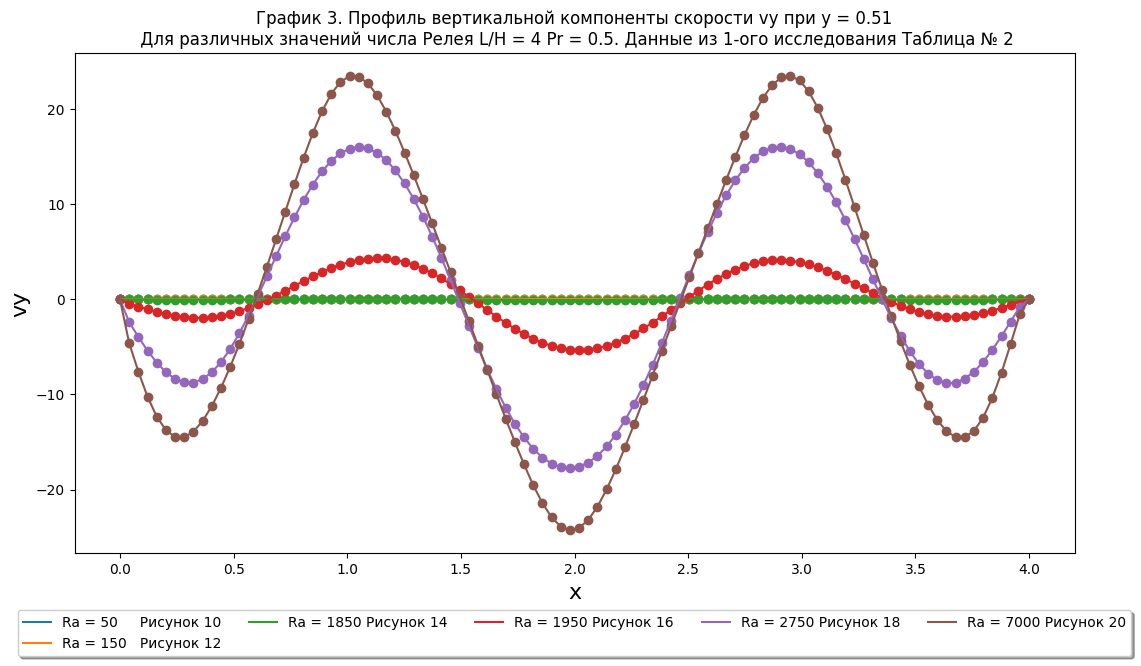

C:\Users\Asus Tuf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:162: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


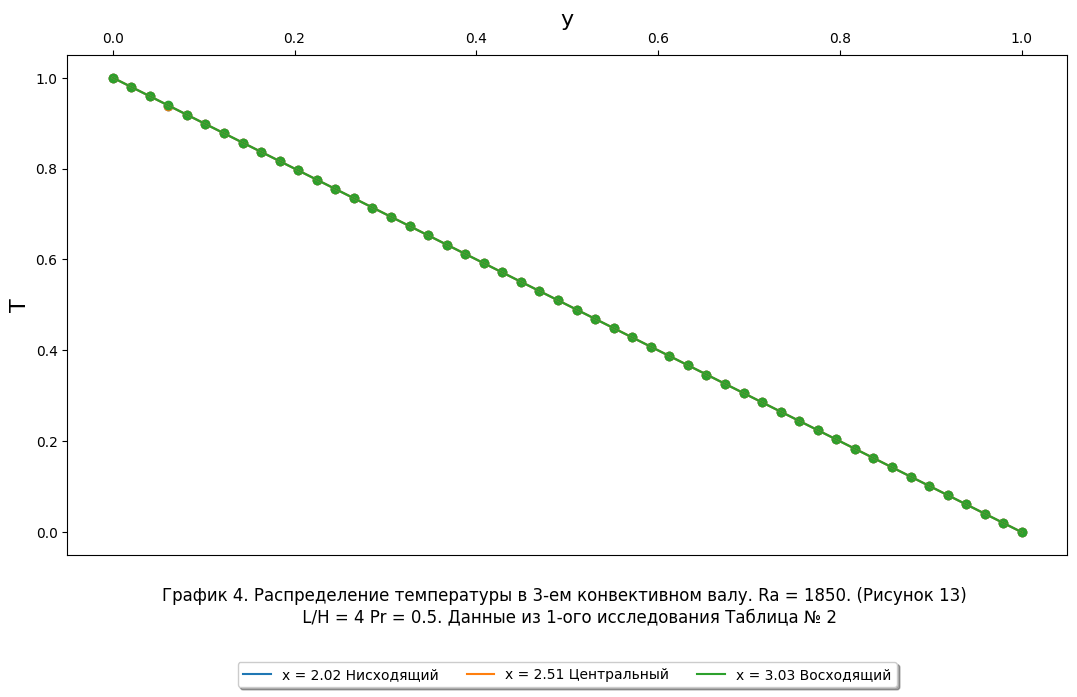

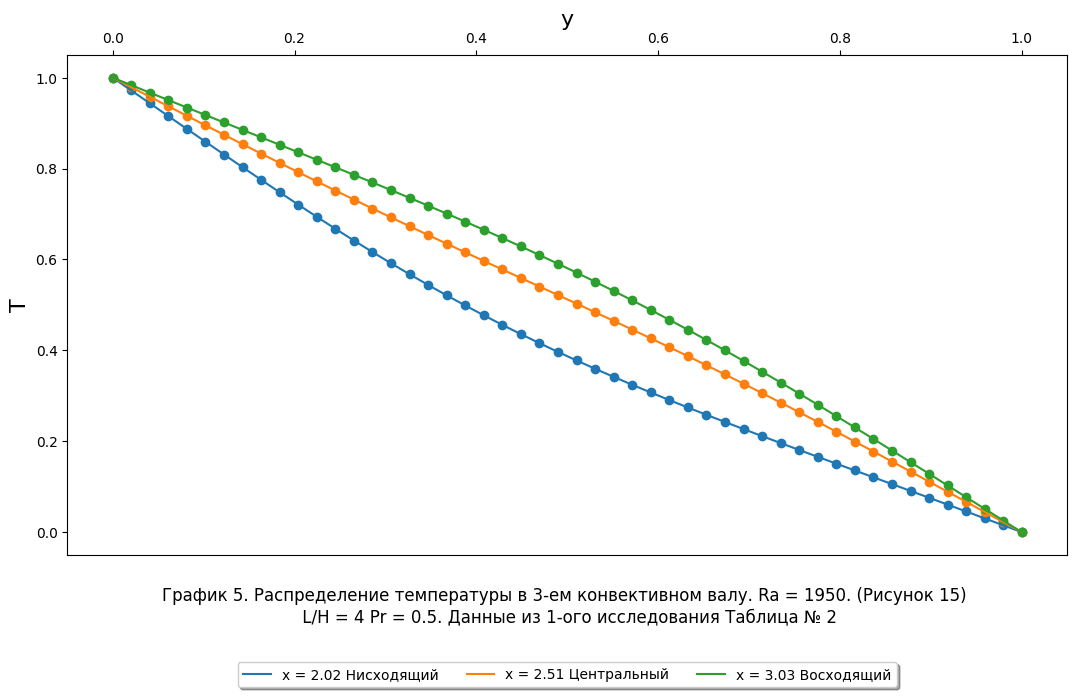

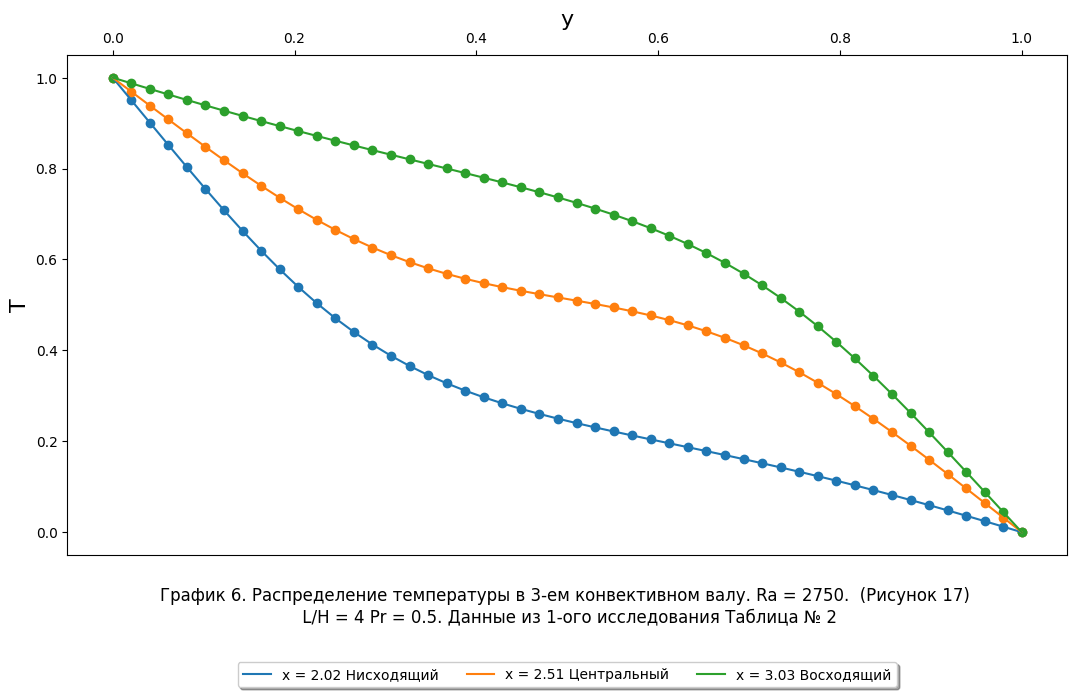

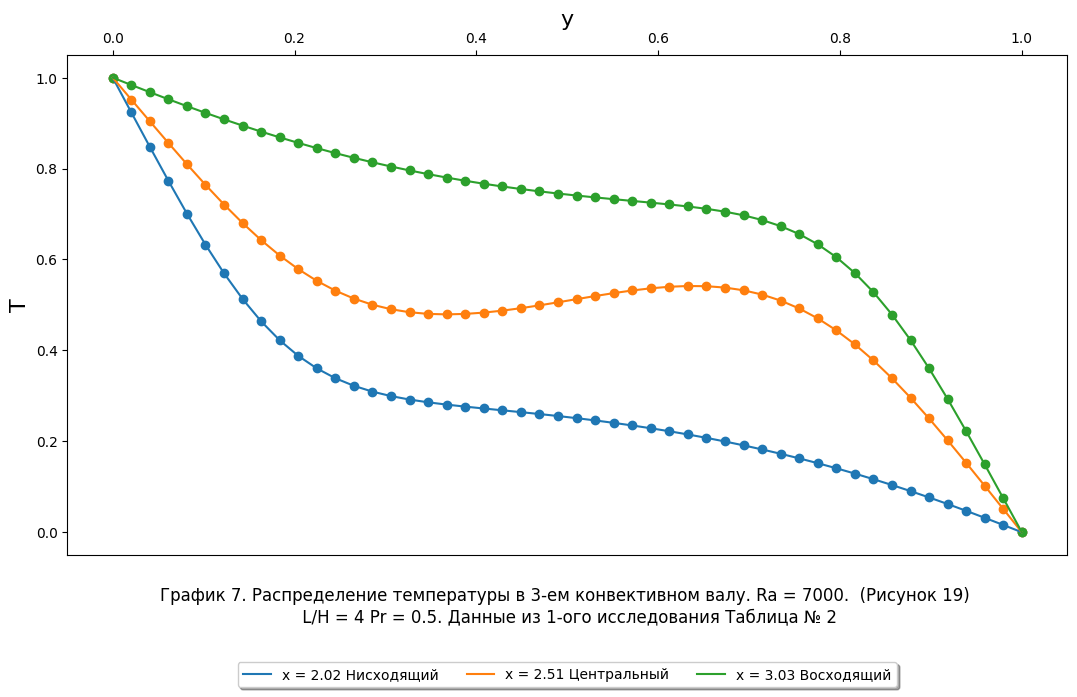

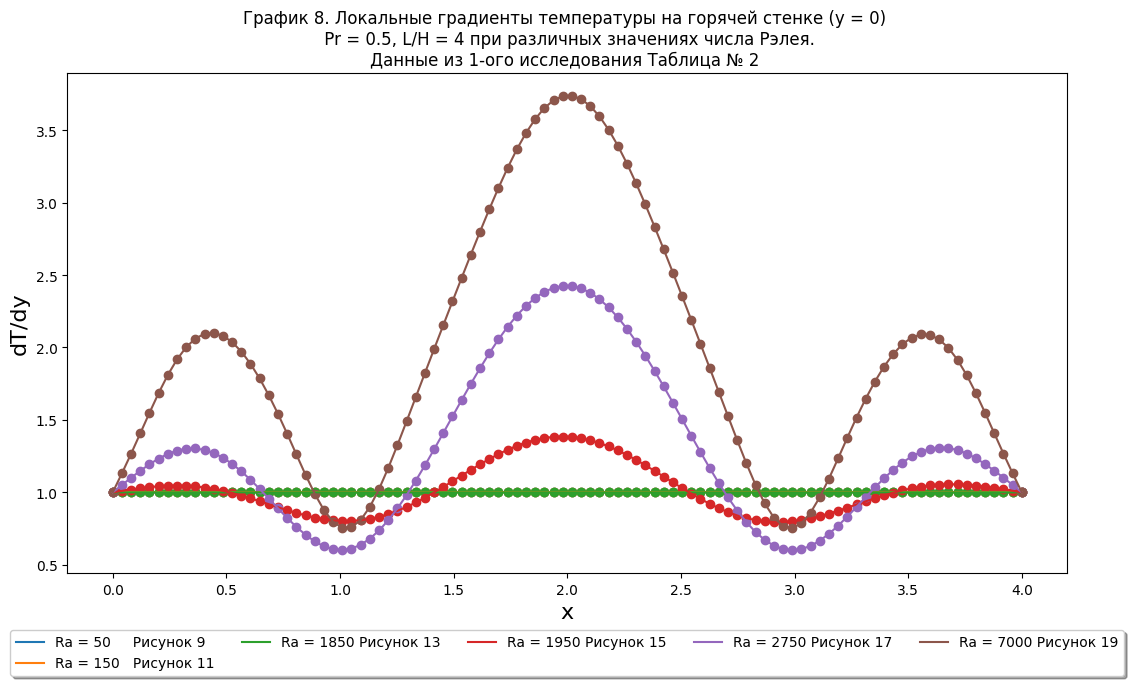

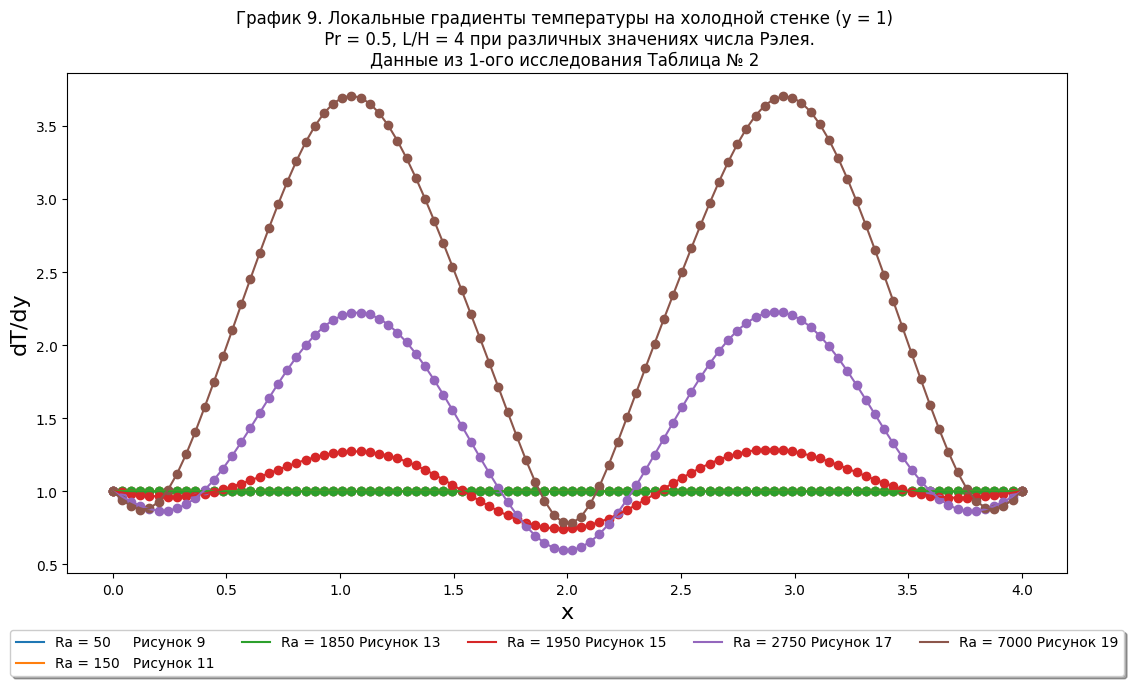

In [72]:
import numpy as np
import matplotlib.pyplot as plt

base_path_vx = "vx/Vx"
base_path_vy = "vy/Vy"
base_path_T = "T/T"

def GenPath(size, base_path):
    return [base_path + str(i) + ".dat" for i in range(1, size+1)]

# Получаем Данные для построени графиков vx(x_0, y)
# Профиль скорости. выбираем x_0 = 2.5 - середина 
def DataVx(file_vx, x_0 = 2.505050505051):
    eps = 1e-10
    file = open(file_vx, 'r')
    datas_all = [np.float64(data.strip().split()) for data in file.readlines()]

    # Формат строчки x y vx
    Data = {'y': [], 'vx': [], 'x0': x_0}

    for data in datas_all:
        if np.abs(data[0] - x_0) <= eps:
            Data['y'].append(data[1])
            Data['vx'].append(data[2])


    file.close()

    return Data

def DataVy(file_vy, y_0 = 0.5102040816327):
    eps = 1e-10
    Data = {'x': [], 'vy': [], 'y0': y_0}
    file = open(file_vy, 'r')
    datas_all = [np.float64(data.strip().split()) for data in file.readlines()]

    for data in datas_all:
        if np.abs(data[1] - y_0) <= eps:
            Data['x'].append(data[0])
            Data['vy'].append(data[2])
    file.close()
    return Data

def DataTy(file_T, x0):
    eps = 1e-10
    Data = {'y': [], 'T': [], 'x0': x0}

    file = open(file_T, 'r')
    datas_all = [np.float64(data.strip().split()) for data in file.readlines()]

    for data in datas_all:
        if np.abs(data[0] - x0) <= eps:
            Data['y'].append(data[1])
            Data['T'].append(data[2])
    file.close()
    return Data

def dTdY_y0(file_T):
    Data_y0 = {'x': [], 'T': [], 'y_0': 0}
    Data_y1 = {'x': [], 'T': [], 'y_1': 0}
    Data = {'x': [], 'dTdY': [], 'y': 0}

    file = open(file_T, 'r')

    data_all = [np.float64(data.strip().split()) for data in file.readlines()]

    
    # Берм нужные данные 
    for data in data_all[0:100]:
        Data_y0['x'].append(data[0])
        Data_y0['T'].append(data[2])

    for data in data_all[100: 200]:
        Data_y1['x'].append(data[0])
        Data_y1['T'].append(data[2])
        Data_y1['y_1'] = data[1]
    
    # Расчет производной 
    Data['x'] = Data_y0['x']
    step = Data_y1['y_1']
    for i in range(0, len(Data_y1['x'])):
        Data['dTdY'].append(-(Data_y1['T'][i] - Data_y0['T'][i])/(step)) 

    file.close()
    return Data

def dTdY_y1(file_T):

    Data_yn =  {'x': [], 'T': [], 'y_0': 1}
    Data_yn_1 = {'x': [], 'T': [], 'y_1': 0}
    Data = {'x': [], 'dTdY': [], 'y': 1}
    file = open(file_T, 'r')
    data_all = [np.float64(data.strip().split()) for data in file.readlines()]

    # y = 1
    for data in data_all[len(data_all)-100: len(data_all)]:
        Data_yn['x'].append(data[0])
        Data_yn['T'].append(data[2])
    
    for data in data_all[len(data_all)-200: len(data_all)-100]:
        Data_yn_1['x'].append(data[0])
        Data_yn_1['T'].append(data[2])
        Data_yn_1['y_1'] = data[1]
    
    # Расчет производной 
    Data['x'] = Data_yn['x']
    step = 1 - Data_yn_1['y_1']

    for i in range(0, len(Data_yn_1['x'])):
        Data['dTdY'].append(-(Data_yn['T'][i] - Data_yn_1['T'][i])/(step))


    file.close()
    return Data

def LeftQuadInteg(DatadTdY):
    res = 0
    for i in range(0, len(DatadTdY['x'])-1):
        res += DatadTdY['dTdY'][i]*(DatadTdY['x'][i+1] - DatadTdY['x'][i])

    return res

def PlotGraph(Datas,keyx, keyy, labels, title, xlabel, ylabel):

 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([1,1,1,1])

    line1 = None
    for data in Datas:    
        line1, = ax.plot(data[keyx], data[keyy])
        ax.scatter(data[keyx], data[keyy])

    ax.set_title(title)
    ax.set_xlabel(xlabel, size = 16)
    ax.set_ylabel(ylabel, size = 16)
    ax.legend([line1],labels = labels, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

    plt.show()

def PlotGraphTemerature(Datas,keyx, keyy, labels, title, xlabel, ylabel):

 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([1,1,1,1])

    line1 = None
    for data in Datas:    
        line1, = ax.plot(data[keyx], data[keyy])
        ax.scatter(data[keyx], data[keyy])

    ax.set_title(title, y=-0.15)
    
    #ax.invert_yaxis()
    ax.axes.xaxis.tick_top()
    #ax.spines['bottom'].set_position(("axes", 1.00))
    ax.axes.xaxis.set_label_position("top")
    ax.set_xlabel(xlabel, size = 16)
    ax.set_ylabel(ylabel, size = 16)
    ax.legend([line1],labels = labels, loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

    plt.show()



# Пути
path_vx = GenPath(6, base_path_vx)
path_vy = GenPath(6, base_path_vy)
path_T = GenPath(6, base_path_T)

dTdY_y0(path_T[0])

# Координаты x нисходящего, центрального и нисходящего 3-его конвективного вала 
x3_convvall = {'x': [2.020202020202, 2.505050505051, 3.030303030303], 'pos': ["Нисходящий", "Центральный", 'Восходящий']}

# Компоненты скорости 
DatasVx = [DataVx(path_vx_i) for path_vx_i in path_vx]
DatasVy = [DataVy(path_vy_i) for path_vy_i in path_vy]

# Изменение температуры в 3-ем конвективном вале при различных числах Релея 
DatasT_Ra1875 = [DataTy(path_T[2], xi) for xi in x3_convvall['x']]
DatasT_Ra1950 = [DataTy(path_T[3], xi) for xi in x3_convvall['x']]
DatasT_Ra2750 = [DataTy(path_T[4], xi) for xi in x3_convvall['x']]
DatasT_Ra7000 = [DataTy(path_T[5], xi) for xi in x3_convvall['x']]

# Локальные тепловые потоки на нижней (подогреваемой стенке) y = 0
DatasdTdY_y0 = [dTdY_y0(path_T_i) for path_T_i in path_T]

# Локальный градиент температуры на верхней стенке (охлождаемой) y = 1
DatasdTdY_y1 = [dTdY_y1(path_T_i) for path_T_i in path_T]


# Расчет числа Нусельта по локальным градиентам температур при y = 0
print(DatasdTdY_y0)
Nu_y0 = [LeftQuadInteg(DatadTdY_y0i)/4.0 for DatadTdY_y0i in DatasdTdY_y0]
Nu_y1 = [LeftQuadInteg(DatadTdY_y1i)/4.0 for DatadTdY_y1i in DatasdTdY_y1]

Nu_y0Data = {'Nu': Nu_y0, 'Ra': [50, 150, 1850, 1950, 2750]}
Nu_y1Data = {'Nu': Nu_y1, 'Ra': [50, 150, 1850, 1950, 2750]}
Nu = [Nu_y0Data, Nu_y1Data]



# Профили скорости 
PlotGraph(DatasVx, 
        'vx',
        'y',
        ["Ra = 50     Рисунок 10", "Ra = 150   Рисунок 12", "Ra = 1850 Рисунок 14", "Ra = 1950 Рисунок 16", "Ra = 2750 Рисунок 18", "Ra = 7000 Рисунок 20"], 
        "График 2. Профиль горизонтальной компоненты скорости при x = " + str(np.round(DatasVx[0]['x0'], 2)) + "\n Для различных значений числа Релея (3 вал центральное сечение) \n  L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 2" ,
        "vx",
        "y")

PlotGraph(DatasVy, 
        'x',
        'vy',
        ["Ra = 50     Рисунок 10", "Ra = 150   Рисунок 12", "Ra = 1850 Рисунок 14", "Ra = 1950 Рисунок 16", "Ra = 2750 Рисунок 18", "Ra = 7000 Рисунок 20"], 
        "График 3. Профиль вертикальной компоненты скорости vy при y = " + str(np.round(DatasVy[0]['y0'], 2)) + "\n Для различных значений числа Релея L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 2" ,
        "x",
        "vy")

# Графики изменения температуры в различных сечениях 
PlotGraphTemerature(DatasT_Ra1875,
          'y',
          'T',
           ["x = " + '{0:.2f} {pos}'.format(x3_convvall['x'][i], pos = x3_convvall['pos'][i]) for i in range(0, len(x3_convvall['x']))],
          "График 4. Распределение температуры в 3-ем конвективном валу. Ra = 1850. (Рисунок 13) \n L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 2",
          "y",
          "T")

PlotGraphTemerature(DatasT_Ra1950,
          'y',
          'T',
          ["x = " + '{0:.2f} {pos}'.format(x3_convvall['x'][i], pos = x3_convvall['pos'][i]) for i in range(0, len(x3_convvall['x']))],
          "График 5. Распределение температуры в 3-ем конвективном валу. Ra = 1950. (Рисунок 15) \n L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 2",
          "y",
          "T")

PlotGraphTemerature(DatasT_Ra2750,
          'y',
          'T',
          ["x = " + '{0:.2f} {pos}'.format(x3_convvall['x'][i], pos = x3_convvall['pos'][i]) for i in range(0, len(x3_convvall['x']))],
          "График 6. Распределение температуры в 3-ем конвективном валу. Ra = 2750.  (Рисунок 17) \n L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 2",
          "y",
          "T")

PlotGraphTemerature(DatasT_Ra7000,
          'y',
          'T',
          ["x = " + '{0:.2f} {pos}'.format(x3_convvall['x'][i], pos = x3_convvall['pos'][i]) for i in range(0, len(x3_convvall['x']))],
          "График 7. Распределение температуры в 3-ем конвективном валу. Ra = 7000.  (Рисунок 19) \n L/H = 4 Pr = 0.5. Данные из 1-ого исследования Таблица № 2",
          "y",
          "T")

# Локальные градиенты температуры 
PlotGraph(DatasdTdY_y0,
          'x',
          'dTdY',
          ["Ra = 50     Рисунок 9", "Ra = 150   Рисунок 11", "Ra = 1850 Рисунок 13", "Ra = 1950 Рисунок 15", "Ra = 2750 Рисунок 17", "Ra = 7000 Рисунок 19"],
           "График 8. Локальные градиенты температуры на горячей стенке (y = 0) \n Pr = 0.5, L/H = 4 при различных значениях числа Рэлея.\nДанные из 1-ого исследования Таблица № 2 ",
           "x",
           "dT/dy")

PlotGraph(DatasdTdY_y1,
          'x',
          'dTdY',
          ["Ra = 50     Рисунок 9", "Ra = 150   Рисунок 11", "Ra = 1850 Рисунок 13", "Ra = 1950 Рисунок 15", "Ra = 2750 Рисунок 17", "Ra = 7000 Рисунок 19"],
           "График 9. Локальные градиенты температуры на холодной стенке (y = 1) \n Pr = 0.5, L/H = 4 при различных значениях числа Рэлея.\nДанные из 1-ого исследования Таблица № 2 ",
           "x",
           "dT/dy")


# PlotGraph(Nu,
#           'Ra',
#           'Nu',
#           ["Nu(Ra) y = 0", "Nu(Ra) y = 1"],
#           "Грфик 9. Зависимость числа Нуссельта от числа Рэлея \n Pr = 0.5, L/H = 4. Первые 5 точек из Таблицы №2 Рисунки 9-18\n ",
#           "Ra",
#           "Nu")
# print(Nu)


C:\Users\Asus Tuf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:138: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


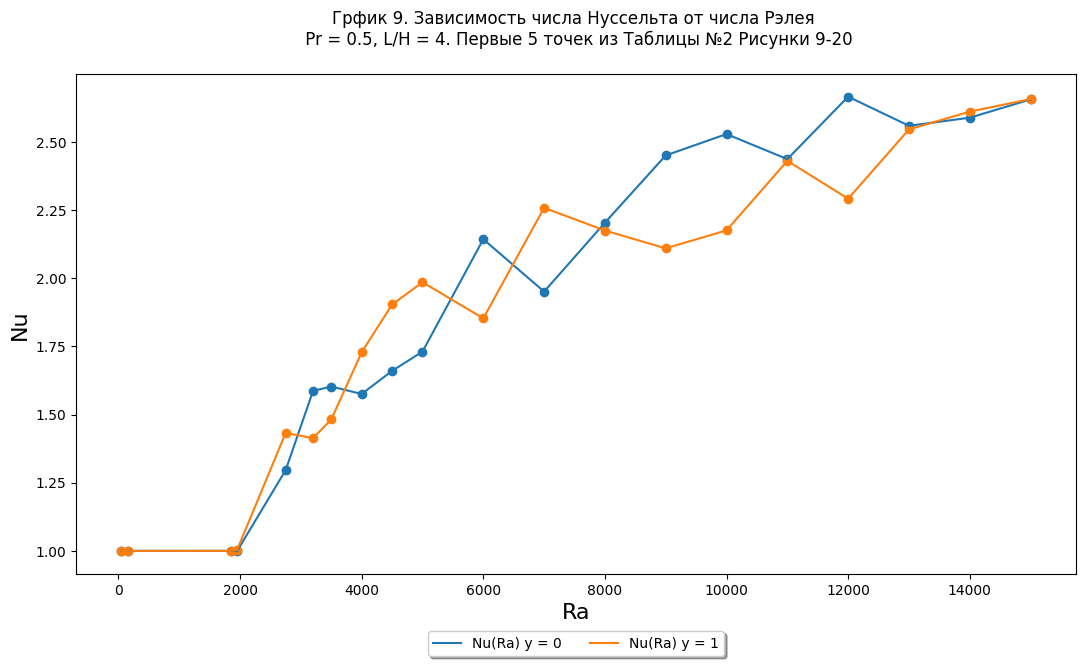

[{'Nu': [0.9999999999990057, 0.9999999999990057, 0.9999596832854258, 0.9986777936960214, 1.296174895167872, 1.586565601752906, 1.602837943794193, 1.575572448140636, 1.6601973460725756, 1.7308209627456344, 2.143159234032204, 1.9510913876154519, 2.2038697201686928, 2.4506832198801276, 2.5289534747728877, 2.4370325942163777, 2.6661782889864507, 2.559322799034217, 2.5891040634832985, 2.6560365413548155], 'Ra': [50, 150, 1850, 1950, 2750, 3200, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]}, {'Nu': [1.0000000000009943, 1.0000000000009943, 1.0000426917134702, 1.002846438768547, 1.432575776810278, 1.4132316366505115, 1.482127790560224, 1.7285712204794488, 1.9038504390194928, 1.985424290067851, 1.8530136653969407, 2.258489740417847, 2.1751679438722418, 2.109753768420299, 2.175741658028265, 2.4307735884355273, 2.291731138153992, 2.546064024340239, 2.6113404477442614, 2.657242248257144], 'Ra': [50, 150, 1850, 1950, 2750, 3200, 3500, 4000, 4500, 5000, 6

In [70]:
# Выводим число Нусельта в зависимости от числа Релея


def dTdY_y0(file_T):
    Data_y0 = {'x': [], 'T': [], 'y_0': 0}
    Data_y1 = {'x': [], 'T': [], 'y_1': 0}
    Data = {'x': [], 'dTdY': [], 'y': 0}

    file = open(file_T, 'r')

    data_all = [np.float64(data.strip().split()) for data in file.readlines()]

    
    # Берм нужные данные 
    for data in data_all[0:200]:
        Data_y0['x'].append(data[0])
        Data_y0['T'].append(data[2])

    for data in data_all[200: 400]:
        Data_y1['x'].append(data[0])
        Data_y1['T'].append(data[2])
        Data_y1['y_1'] = data[1]
    
    # Расчет производной 
    Data['x'] = Data_y0['x']
    step = Data_y1['y_1']
    for i in range(0, len(Data_y1['x'])):
        Data['dTdY'].append(-(Data_y1['T'][i] - Data_y0['T'][i])/(step)) 

    file.close()
    return Data

def dTdY_y1(file_T):

    Data_yn =  {'x': [], 'T': [], 'y_0': 1}
    Data_yn_1 = {'x': [], 'T': [], 'y_1': 0}
    Data = {'x': [], 'dTdY': [], 'y': 1}
    file = open(file_T, 'r')
    data_all = [np.float64(data.strip().split()) for data in file.readlines()]

    # y = 1
    for data in data_all[len(data_all)-200: len(data_all)]:
        Data_yn['x'].append(data[0])
        Data_yn['T'].append(data[2])
    
    for data in data_all[len(data_all)-400: len(data_all)-200]:
        Data_yn_1['x'].append(data[0])
        Data_yn_1['T'].append(data[2])
        Data_yn_1['y_1'] = data[1]
    
    # Расчет производной 
    Data['x'] = Data_yn['x']
    step = 1 - Data_yn_1['y_1']

    for i in range(0, len(Data_yn_1['x'])):
        Data['dTdY'].append(-(Data_yn['T'][i] - Data_yn_1['T'][i])/(step))


    file.close()
    return Data


base_path_T = "T_dpr/T"

path_T = GenPath(20, base_path_T)

# Локальные тепловые потоки на нижней (подогреваемой стенке) y = 0
DatasdTdY_y0 = [dTdY_y0(path_T_i) for path_T_i in path_T]

# Локальный градиент температуры на верхней стенке (охлождаемой) y = 1
DatasdTdY_y1 = [dTdY_y1(path_T_i) for path_T_i in path_T]


# Расчет числа Нусельта по локальным градиентам температур при y = 0
Nu_y0 = [LeftQuadInteg(DatadTdY_y0i)/4.0 for DatadTdY_y0i in DatasdTdY_y0]
Nu_y1 = [LeftQuadInteg(DatadTdY_y1i)/4.0 for DatadTdY_y1i in DatasdTdY_y1]

Nu_y0Data = {'Nu': Nu_y0, 'Ra': [50, 150, 1850, 1950, 2750, 3200, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]}
Nu_y1Data = {'Nu': Nu_y1, 'Ra': [50, 150, 1850, 1950, 2750, 3200, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]}
Nu = [Nu_y0Data, Nu_y1Data]

# Выводим число Нусельта в зависимости от числа Релея
PlotGraph(Nu,
          'Ra',
          'Nu',
          ["Nu(Ra) y = 0", "Nu(Ra) y = 1"],
          "Грфик 9. Зависимость числа Нуссельта от числа Рэлея \n Pr = 0.5, L/H = 4. Первые 5 точек из Таблицы №2 Рисунки 9-20\n ",
          "Ra",
          "Nu")

print(Nu)

C:\Users\Asus Tuf\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:138: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


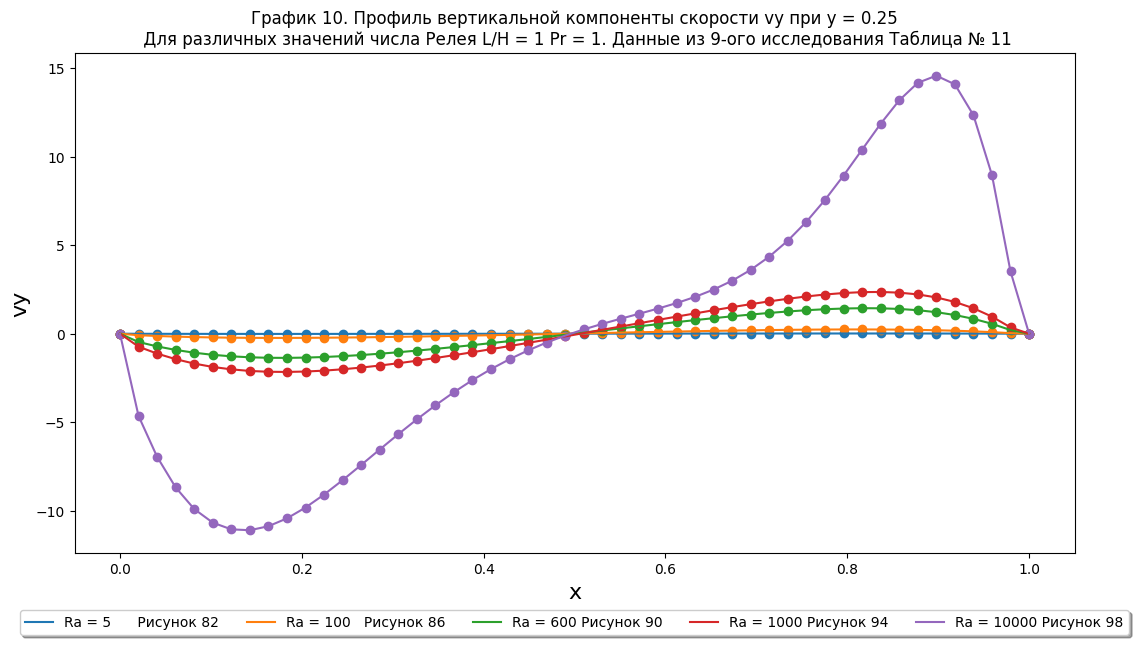

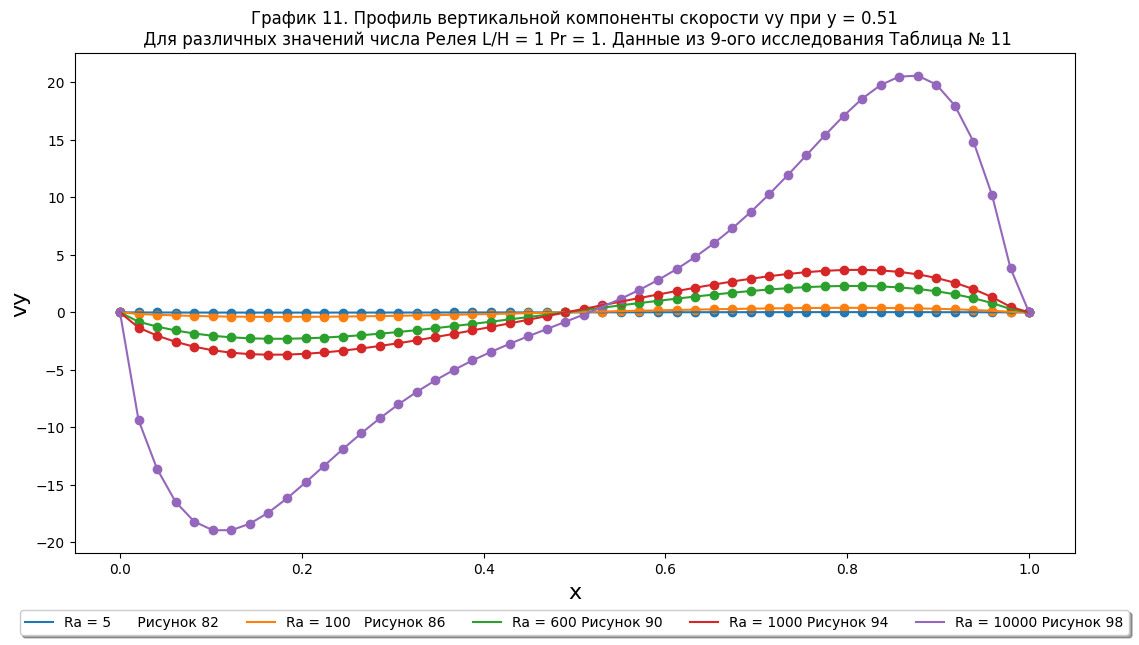

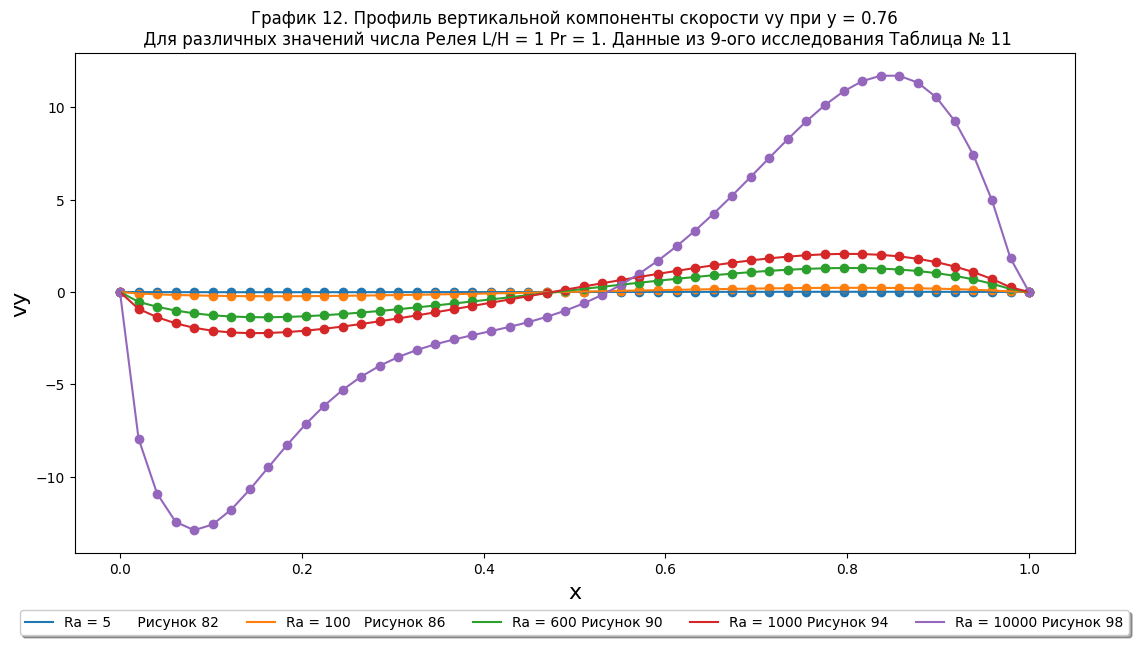

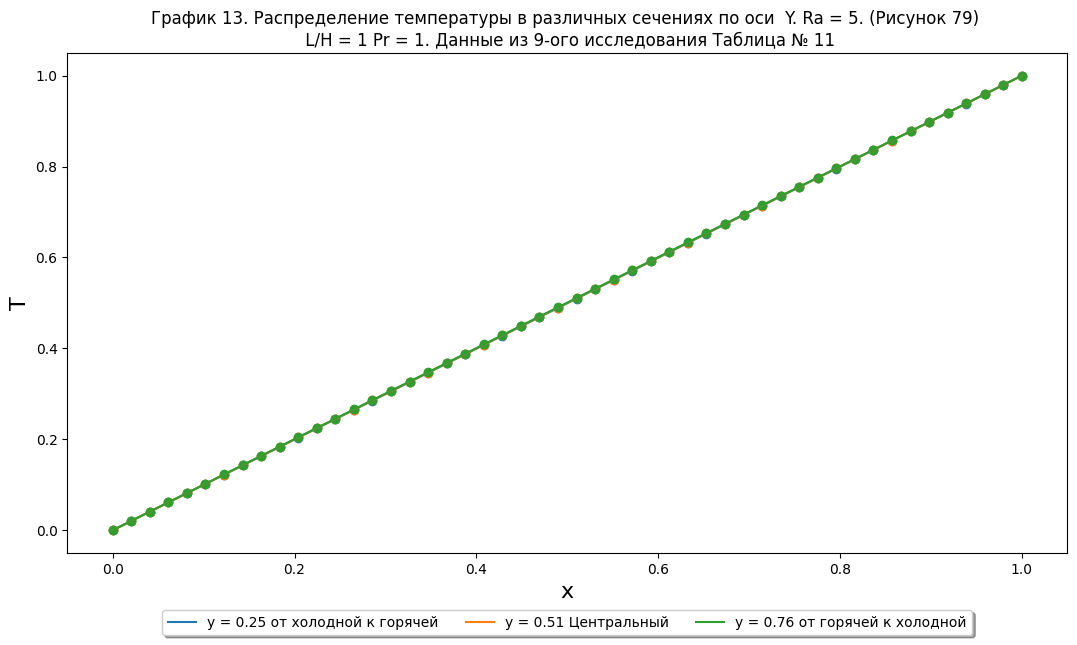

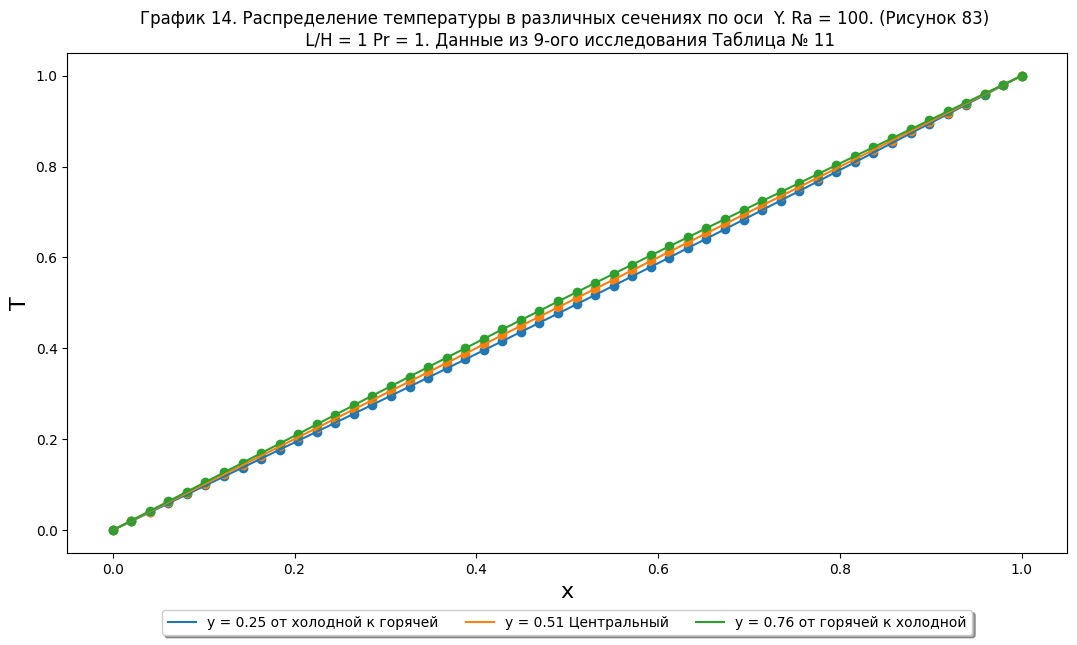

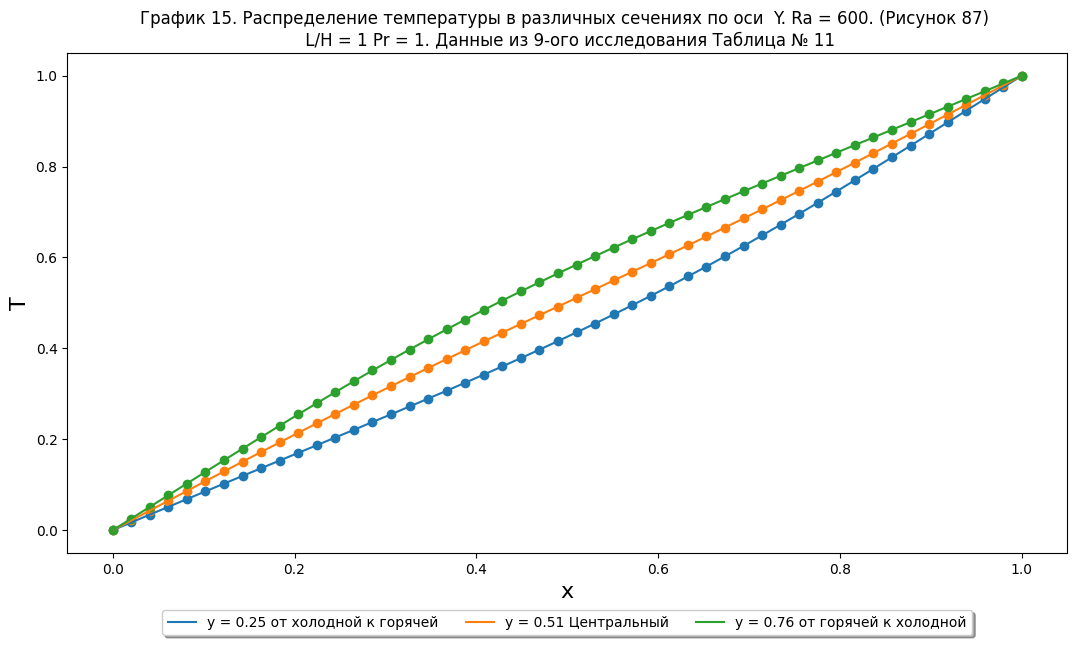

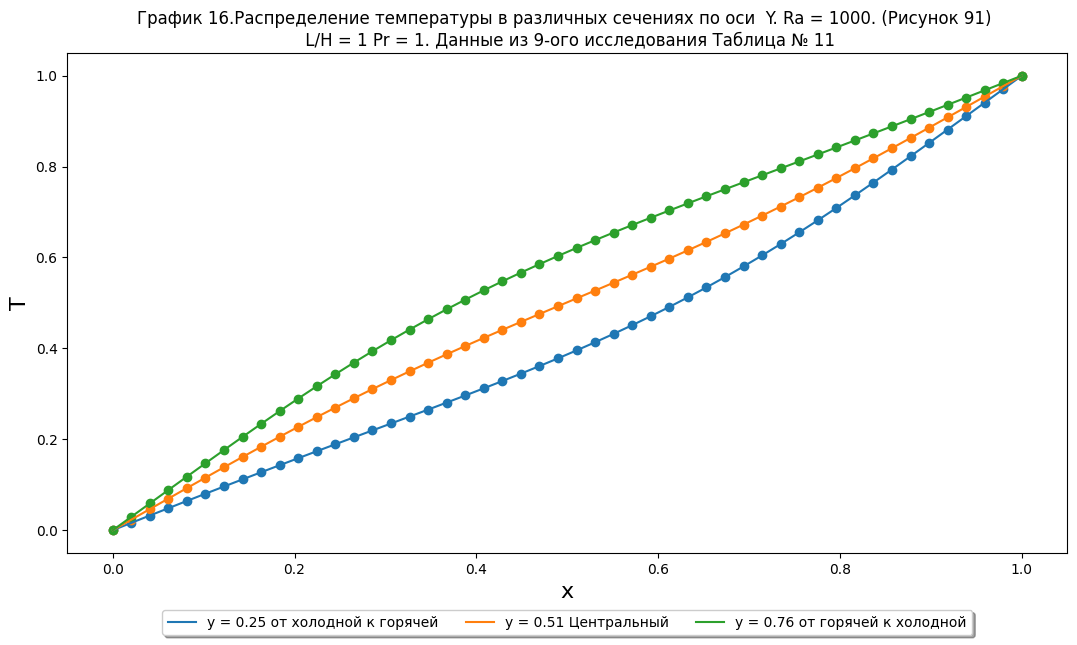

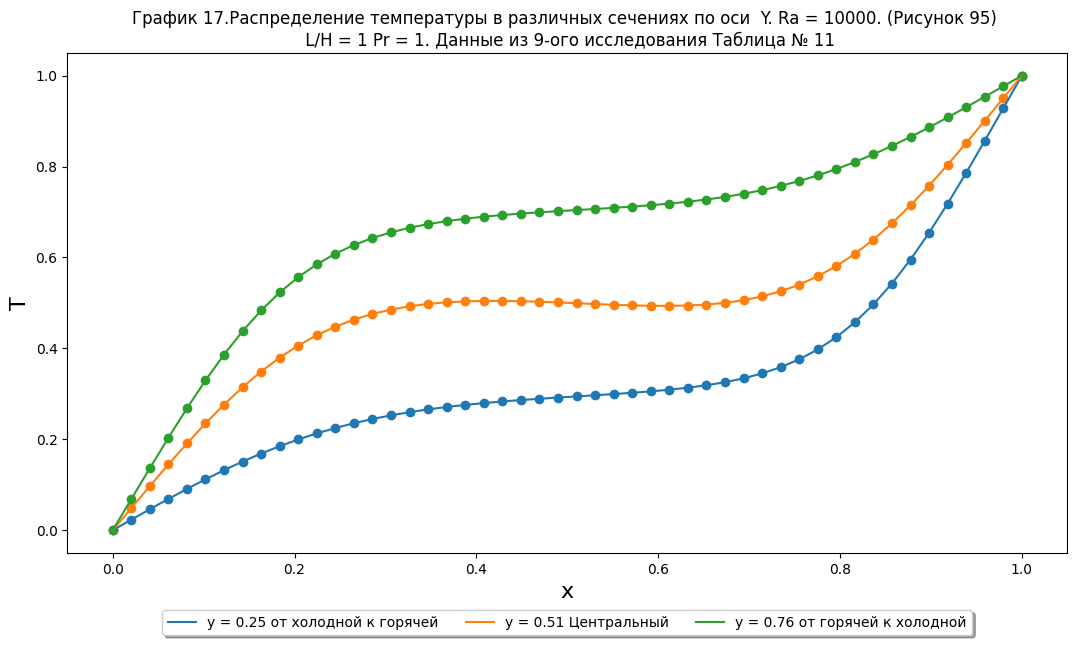

In [85]:
# Построение графиков профиля скороси vy в различных сечениях y = h/4, h/2, 3h/4
# Построить профили температуры для всех валов при x = L/2 и ради интереса в H/4 и H/2 и 3H/4

base_path_T = "T_vert/T"
base_path_vy = "vy_vert/Vy"

path_vy = GenPath(5, base_path_vy)
path_T = GenPath(5, base_path_T)


h4 = 0.2525252525253
h2 = 0.5050505050505
_3h4 =  0.7575757575758

y3_convvall = {'y': [h4, h2, _3h4], 'pos': ["от холодной к горячей", "Центральный", 'от горячей к холодной']}


DatasVy_h4 = [DataVy(path_vy_i, h4) for path_vy_i in path_vy]
DatasVy_h2 = [DataVy(path_vy_i, h2) for path_vy_i in path_vy]
DatasVy_3h4 = [DataVy(path_vy_i, _3h4) for path_vy_i in path_vy]


DatasT_Ra5 =     [DataVy(path_T[0], yi) for yi in y3_convvall['y']]
DatasT_Ra100 =   [DataVy(path_T[1], yi) for yi in y3_convvall['y']]
DatasT_Ra600 =   [DataVy(path_T[2], yi) for yi in y3_convvall['y']]
DatasT_Ra1000 =  [DataVy(path_T[3], yi) for yi in y3_convvall['y']]
DatasT_Ra10000 = [DataVy(path_T[4], yi) for yi in y3_convvall['y']]



PlotGraph(DatasVy_h4, 
        'x',
        'vy',
        ["Ra = 5      Рисунок 82", "Ra = 100   Рисунок 86", "Ra = 600 Рисунок 90", "Ra = 1000 Рисунок 94", "Ra = 10000 Рисунок 98"], 
        "График 10. Профиль вертикальной компоненты скорости vy при y = " + str(np.round(DatasVy_h4[0]['y0'], 2)) + "\n Для различных значений числа Релея L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11" ,
        "x",
        "vy")

PlotGraph(DatasVy_h2, 
        'x',
        'vy',
        ["Ra = 5      Рисунок 82", "Ra = 100   Рисунок 86", "Ra = 600 Рисунок 90", "Ra = 1000 Рисунок 94", "Ra = 10000 Рисунок 98"], 
        "График 11. Профиль вертикальной компоненты скорости vy при y = " + str(np.round(DatasVy_h2[0]['y0'], 2)) + "\n Для различных значений числа Релея L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11" ,
        "x",
        "vy")

PlotGraph(DatasVy_3h4, 
        'x',
        'vy',
        ["Ra = 5      Рисунок 82", "Ra = 100   Рисунок 86", "Ra = 600 Рисунок 90", "Ra = 1000 Рисунок 94", "Ra = 10000 Рисунок 98"], 
        "График 12. Профиль вертикальной компоненты скорости vy при y = " + str(np.round(DatasVy_3h4[0]['y0'], 2)) + "\n Для различных значений числа Релея L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11" ,
        "x",
        "vy")

# Температура 

PlotGraph(DatasT_Ra5,
          'x',
          'vy',
          ["y = " + '{0:.2f} {pos}'.format(y3_convvall['y'][i], pos = y3_convvall['pos'][i]) for i in range(0, len(y3_convvall['y']))],
          "График 13. Распределение температуры в различных сечениях по оси  Y. Ra = 5. (Рисунок 79) \n L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11",
          "x",
          "T")
PlotGraph(DatasT_Ra100,
          'x',
          'vy',
          ["y = " + '{0:.2f} {pos}'.format(y3_convvall['y'][i], pos = y3_convvall['pos'][i]) for i in range(0, len(y3_convvall['y']))],
          "График 14. Распределение температуры в различных сечениях по оси  Y. Ra = 100. (Рисунок 83) \n L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11",
          "x",
          "T")
PlotGraph(DatasT_Ra600,
          'x',
          'vy',
          ["y = " + '{0:.2f} {pos}'.format(y3_convvall['y'][i], pos = y3_convvall['pos'][i]) for i in range(0, len(y3_convvall['y']))],
          "График 15. Распределение температуры в различных сечениях по оси  Y. Ra = 600. (Рисунок 87) \n L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11",
          "x",
          "T")
PlotGraph(DatasT_Ra1000,
          'x',
          'vy',
          ["y = " + '{0:.2f} {pos}'.format(y3_convvall['y'][i], pos = y3_convvall['pos'][i]) for i in range(0, len(y3_convvall['y']))],
          "График 16.Распределение температуры в различных сечениях по оси  Y. Ra = 1000. (Рисунок 91) \n L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11",
          "x",
          "T")
PlotGraph(DatasT_Ra10000,
          'x',
          'vy',
          ["y = " + '{0:.2f} {pos}'.format(y3_convvall['y'][i], pos = y3_convvall['pos'][i]) for i in range(0, len(y3_convvall['y']))],
          "График 17.Распределение температуры в различных сечениях по оси  Y. Ra = 10000. (Рисунок 95) \n L/H = 1 Pr = 1. Данные из 9-ого исследования Таблица № 11",
          "x",
          "T")
